1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que lo muevas a esa carpeta desde el comienzo del examen.

4) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [2]:
4+3+3

10

COMENTARIOS:

1)

En este examen los tres ejercicios están relacionados, de una forma u otra,  con el *cálculo de factoriales de enteros*. Debe sorprendernos, al menos un poco,  que sea posible calcular estos enteros enormes en tan poco tiempo, y  el tercer ejercicio empieza a indicar cómo podemos mejorar la simple multiplicación de los enteros entre $1$ y $n$.  

## Ejercicio 1 (4 puntos)

La congruencia de Wilson afirma que para todo número primo $p$ se verifica que el factorial de $p-1$ es congruente con $-1$ módulo $p$. Es interesante que el recíproco también es cierto: si un entero $n$ verifica la congruencia de Wilson entonces es primo, y por tanto la congruencia de Wilson puede servir como un criterio de primalidad.

El método más simple, pero no el más eficiente,  para determinar si un número $n$ es primo es la criba de Eratóstenes, es decir,  $n$ es primo si después de cribar la lista de enteros entre $2$ y $n$, ambos inclusive, $n$ está todavía en la lista cribada. Vimos en clase dos formas de implementar la criba, la segunda,  mucho más eficiente que la primera, se reproduce en la siguiente celda. 

**En este ejercicio debes comparar, en términos de eficiencia,  la criba con el criterio de Wilson como método para decidir si un entero $n$ es primo, es decir, debes producir  evidencia que demuestre, suficientemente, cuál de los dos métodos es mejor. No olvides discutir las consecuencias que obtienes del experimento.**

Para medir tiempos puedes usar la función de SAGE $cputime()$, y con los tiempos obtenidos debes generar gráficas que permitan **ver** la diferencia entre los métodos.

El número de enteros $n$ para los que medimos los tiempos  no puede ser muy grande, por ejemplo deberíamos conformarnos con unos $100$ enteros, pero los enteros $n$ habría que seleccionarlos, usando la función de SAGE $randint(N1,N2)$,  en rangos $[N1,N2]$ suficientemente grandes. Por ejemplo, puedes usar $[10^4,10^5]$ y también $[10^5,10^6]$. Los parámetros sugeridos son sólo una indicación, y puede ser necesario modificarlos, pero si se aumenta el rango, por ejemplo hasta $10^7$, sería conveniente disminuir el número de enteros para los que medimos los tiempos. 

**¿Qué buscamos con este experimento? Es muy posible que en cierto rango $[N1,N2]$ uno de los métodos sea sistemáticamente mejor y en otro rango lo sea el otro. Querríamos identificar aproximadamente dónde se produce, si es que se produce,  el cambio.**




In [3]:
def criba(n):
        aux = [True]*int(n)
        aux[0] = False
        aux[1] = False
        for i in xrange(2,floor(sqrt(n))+1):
            if aux[i]:
                for j in xrange(i*i,n,i):
                    aux[j] = False
        return [k for k in xrange(n) if aux[k]==True]

In [4]:
def wilson(x):
    f=factorial(x-1)
    if (f%x==(x-1)):
        return True
    else:
        return False

In [5]:
C=criba(100)

In [6]:
wilson(11)

True

In [7]:
def primo_criba(n,L):
    if n in L:
        return True
    return False

In [8]:
primo_criba(11,C)

True

In [9]:
def primo_rango_criba(N1, N2):
    R=[]
    L = [randint(N1,N2) for _ in xsrange(100)]
    C = criba(N2)
    for i in range(0,len(L)-1):
        if(primo_criba(L[i],C)==True):
            R.append(L[i])
    return R
        

In [10]:
def primo_rango_wilson(N1, N2):
    R=[]
    L = [randint(N1,N2) for _ in xsrange(100)]
    for i in range(0,len(L)):
        if(wilson(L[i])==True):
            R.append(L[i])
    return R

In [11]:
L=[] #obtengo una lista de rangos para representar
for i in range(1,6):
    for j in range(1,10):
        L.append((1,j*10^i))

In [12]:
print L

[(1, 10), (1, 20), (1, 30), (1, 40), (1, 50), (1, 60), (1, 70), (1, 80), (1, 90), (1, 100), (1, 200), (1, 300), (1, 400), (1, 500), (1, 600), (1, 700), (1, 800), (1, 900), (1, 1000), (1, 2000), (1, 3000), (1, 4000), (1, 5000), (1, 6000), (1, 7000), (1, 8000), (1, 9000), (1, 10000), (1, 20000), (1, 30000), (1, 40000), (1, 50000), (1, 60000), (1, 70000), (1, 80000), (1, 90000), (1, 100000), (1, 200000), (1, 300000), (1, 400000), (1, 500000), (1, 600000), (1, 700000), (1, 800000), (1, 900000)]


In [13]:
R=[]
H=[]
for i in srange(len(L)):    
    R.append((L[i][1],cputime(primo_rango_criba(L[i][0],L[i][1]))))
    H.append((L[i][1],cputime(primo_rango_wilson(L[i][0],L[i][1]))))
    
print R

[(10, 3.8680000000000003), (20, 3.8680000000000003), (30, 3.8680000000000003), (40, 3.872), (50, 3.872), (60, 3.872), (70, 3.8760000000000003), (80, 3.8760000000000003), (90, 3.8760000000000003), (100, 3.88), (200, 3.88), (300, 3.88), (400, 3.88), (500, 3.8840000000000003), (600, 3.8840000000000003), (700, 3.888), (800, 3.888), (900, 3.8920000000000003), (1000, 3.8920000000000003), (2000, 3.896), (3000, 3.9000000000000004), (4000, 3.9080000000000004), (5000, 3.912), (6000, 3.92), (7000, 3.9320000000000004), (8000, 3.944), (9000, 3.96), (10000, 3.976), (20000, 4.0), (30000, 4.06), (40000, 4.18), (50000, 4.328), (60000, 4.548), (70000, 4.824), (80000, 5.156), (90000, 5.5840000000000005), (100000, 6.072), (200000, 6.724), (300000, 8.024), (400000, 10.056000000000001), (500000, 12.896), (600000, 16.348), (700000, 22.072), (800000, 28.096), (900000, 34.980000000000004)]


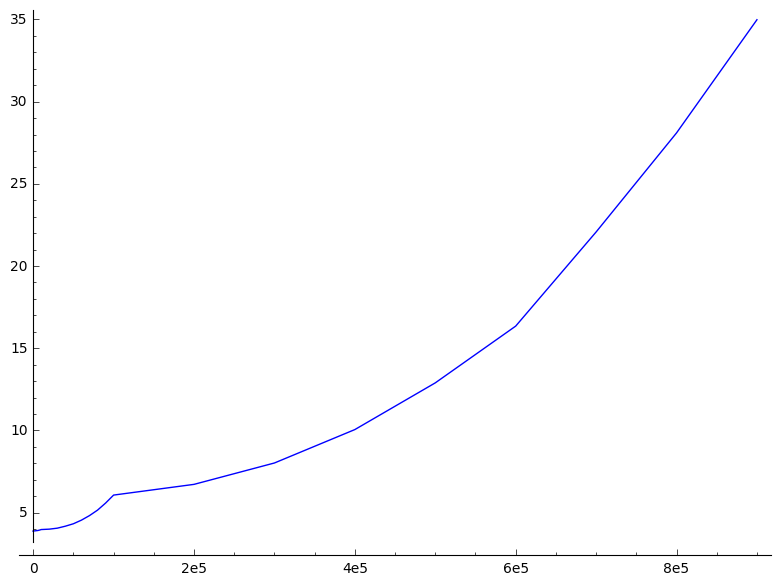

In [14]:
linea1=line2d(R)
linea1.show()

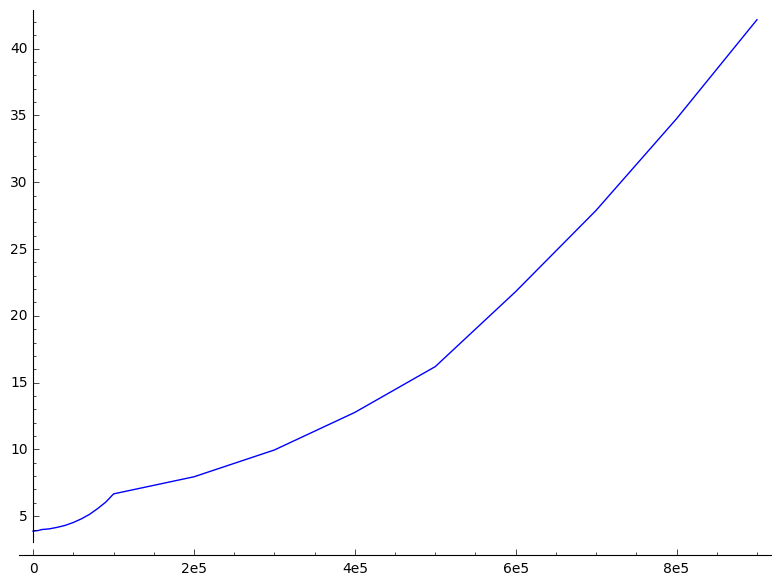

In [15]:
linea2=line2d(H)
linea2.show()

Como se puede apreciar en las gráficas el tiempo que tardan en clasificar los números de primos de una lista de 100 enteros ambas funciones es parabólico (se asemeja a una función polinómica de grado 2) respecto al rango de valores de los enteros de esa lista, y se puede ver como tendencia a incrementar del método que usa el Teorema de Wilson es más pronunciada, y por tanto este método es cada vez peor cuanto más aumenta el rango. Esto se puede deber a la complejidad de calcular el factorial de (p-1) frente a la relativa sencillez de calcular módulos en el método criba. Con valores más grandes la tendencia se debería mantener pero la diferencia entre ambos debería incrementarse.

## Ejercicio 2 (3 puntos)

En este ejercicio **estudiamos diversos métodos para calcular el número binomial $\binom{n}{m}$**, que,  por definición,  es el entero $$\binom{n}{m}:=\frac{n!}{m!(n-m)!},$$ y cuenta el número de subconjuntos con $m$ elementos de un conjunto de $n$ elementos. 

1) Un primer método,  que usaremos como base para nuestras comparaciones, consiste en usar la definición anterior
directamente, es decir, calculando los factoriales y realizando las operaciones indicadas. Define una función de SAGE de nombre $binomial\_1(n,m)$ y que devuelva el factorial calculado de esta manera. 

2) El cálculo anterior se puede organizar mejor: simplificamos $(n-m)!$ con parte de $n!$ y utilizamos que queda el mismo número de factores en el numerador que en el denominador para calcular el binomial más eficientemente. Define una función de SAGE de nombre $binomial\_2(n,m)$ y que devuelva el factorial calculado de esta manera. 

3) Otra manera de calcular el binomial es la base del *triángulo de Tartaglia*, es decir, las relaciones 
$$\binom{n}{0}=\binom{n}{n}=1;\binom{n}{m}=\binom{n-1}{m-1}+\binom{n-1}{m},$$
que permitirían una definición recursiva del binomial. NO se pide esta solución recursiva, que no sería nada eficiente,  sino una iterativa equivalente. Define una función de SAGE de nombre $binomial\_3(n,m)$ que utilice bucles y las relaciones anteriores para calcular el binomial. En cierto sentido este programa haría  lo mismo que cuando calculamos el triángulo de Tartaglia a mano. 

4) **Ejecuta las celdas incluidas al final de este ejercicio para comprobar que las funciones son correctas. ¿Algún comentario acerca de estos resultados?**



In [16]:
def binomial_1(n,m):
    denom = factorial(m)*factorial(n-m)
    res = factorial(n)/denom
    return res

In [17]:
def binomial_2(n,m):
    fact=1
    for i in range (1, m+1):
        fact*=(n-m+i)/(i)
    return fact

In [18]:
def binomial_3(n,m):
    L=[1]
    i=1
    while i<n+1:
        R=[]
        R.append(1)
        for j in range(1, i):
            R.append(L[j-1]+L[j])
        R.append(1)
        L=R
        i+=1
    return L[m]
    
        

In [19]:
%time N = binomial(12456758,65293) ##Binomial de SAGE

CPU times: user 472 ms, sys: 0 ns, total: 472 ms
Wall time: 471 ms


In [20]:
%time N == binomial_1(12456758,65293)

CPU times: user 15.5 s, sys: 420 ms, total: 15.9 s
Wall time: 15.9 s


True

In [ ]:
%time N == binomial_2(12456758,65293)

CPU times: user 2.42 s, sys: 16 ms, total: 2.44 s
Wall time: 2.41 s


True

In [ ]:
%time binomial_3(12456758,65293)

In [ ]:
%time binomial(27,9)==binomial_3(27,9)

El algoritmo realizado para binomial_3 ahora mismo calcula todas las filas del triángulo de Tartaglia/Pascal, cuando se podría optimizar para que elija tan solo las secciones que son pertinentes para encontrar el valor de binomial(n,m) sin tener en cuenta el resto. Si diera tiempo en el examen se realizará a continuación.

In [ ]:
def binomial_3_mejorado(n,m):
    L=[1]
    i=1
    while i<n+1:
        R=[]
        R.append(1)
        for j in range(1, i):
            R.append(L[j-1]+L[j])
        R.append(1)
        L=R
        if(m<i/2): #idea sin probar de elección dicotómica de la lista
            L=R[:floor(i/2)]
        if(m>i/2):
            L=R[floor(i/2):]
        i+=1
    return L[m]
    

## Ejercicio 3 (3 puntos)

Finalmente, estudiamos un **algoritmo para calcular factoriales** basado en el siguiente teorema:

*Dados un entero $n$ y un primo $p\le n$ el exponente de $p$ en la factorización de $n!$ en producto de primos es el entero $$exponente(p):=\sum_{i=1}^{i=\infty} floor(n/p^i).$$*

Observa que la suma es en realidad finita, ya que en cuanto $p^i$ supera a $n$ los sumandos son todos cero, y para todos los primos $p\le n$ el exponente correspondiente es al menos $1$. 

1) Define una función que reciba el entero $n$ como argumento y devuelva una lista de pares con el primer elemento de cada par uno de los primos $p\le n$  y el segundo el exponente que corresponde a $p$ de acuerdo al teorema mencionado. 
Para generar la lista de primos menores o iguales a $n$ puedes usar la función de SAGE $prime\_range$ o bien la función $criba$ del Ejercicio $1$. 

2) Define una función de nombre $factorial\_n(n)$ que en primer lugar llame a la función del apartado anterior, y luego calcule el producto de todos los primos elevado cada uno a su exponente. El resultado debe ser el factorial de $n$. Para elevar cada primo a su exponente debería usarse el algoritmo recursivo, bastante eficiente,  visto en clase. 

3) **Ejecuta las celdas al final de este ejercicio para comprobar que la función definida es correcta.**

4) **¿Se te ocurre alguna manera de mejorar la eficiencia de $factorial\_n(n)$? Explica.**


In [ ]:
L=[(1,2)]
print L[0][1]

In [ ]:
def pares_primos(n):
    L = prime_range(2,n)
    R = []
    for i in range (0, len(L)):
        sum=0
        j=1
        a=1
        while a!=0:
            a=floor(n/(L[i]**j))
            sum+=a
            j+=1
        R.append([L[i],sum])
    return R
        

In [ ]:
pares_primos(17)

In [ ]:
factor(factorial(17))

In [ ]:
def potencia(a,k):
    if k==0:
        return 1
    elif k %2 == 0:
        b = potencia(a,k/2)
        return (b*b)
    else:
        b = potencia(a,(k-1)/2)
        return (a*b*b)

In [ ]:
def factorial_n(n):
    L = pares_primos(n)
    prod=1
    for i in range(0, len(L)):
        prod*=potencia(L[i][0],L[i][1])
    return prod

In [ ]:
%time N1=factorial(657975) ##Factorial de SAGE

In [ ]:
%time N1==factorial_n(657975)

In [ ]:
def factorial_n(n):
    L = pares_primos(n)
    prod=1
    for i in range(0, len(L)):
        prod*=power(L[i][0],L[i][1])
    return prod

In [ ]:
%time N1==factorial_n(657975)

Curiosamente como se puede ver la función recursiva es del mismo orden de complejidad que la normal de sage, incluso levemente peor

Como se puede ver la ejecución de las celdas es correcta. Sin embargo, los tiempos de ejecución del algoritmo son mucho mayores que los de el algoritmo de sage, del orden de 15 s frente a 90 ms. Tal vez una forma de mejorar esto sería ir calculando el producto ya en la función pares primos y simplemente multiplicar para aprovechar el bucle ya hecho.

In [ ]:
def pares_primos_2(n):
    L = prime_range(2,n)
    R = []
    for i in range (0, len(L)):
        sum=0
        j=1
        a=1
        while a!=0:
            a=floor(n/(L[i]**j))
            sum+=a
            j+=1
        R.append(power(L[i],sum))
    return R
        

In [ ]:
def factorial_n_2(n):
    L = pares_primos_2(n)
    return prod(L)

In [ ]:
%time N2==factorial_n_2(657975)

Como podemos ver este sencillo aprovechamiento del bucle ya realizado nos permite rebajar el orden de ejecución desde 15s a 509 ms manteniendo un resultado correcto. Con esto resulta ser un mejor método que binomial_1 y binomial_2 por un margen amplio, aunque sigue siendo 5 veces más lento que el algoritmo de sage.